<a href="https://colab.research.google.com/github/Kristina-Analyst/Python/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple linear regression

Власник інтернет-магазину хоче зрозуміти, які фактори впливають на **середній чек клієнта** (цільова змінна). Для цього можна побудувати багатофакторну лінійну регресійну модель, яка прогнозуватиме середній чек клієнта на основі кількох пояснюючих змінних.

Опис даних:

- Цільова змінна ($y$): Середній чек клієнта (грн).

- Пояснюючі змінні:
 - $x_1$: Кількість товарів у кошику.
 - $x_2$: Середня ціна одиниці товару (грн).
 - $x_3$: Відсоток знижки, застосованої до замовлення (%).
 - $x_4$: Час, проведений на сайті перед оформленням замовлення (хвилини).

Вихідні дані:

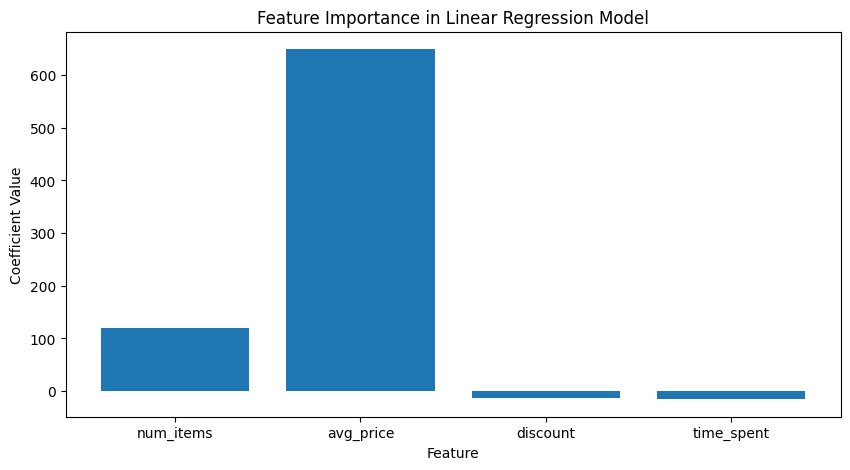


MAE: 172.39425796096626
R2: 0.8992539413123942

Cross-val score (mae): [-129.2032032  -166.2782     -156.15597443 -119.08749059 -147.72852745]
Mean cross-val score (mae): -143.6906791344169

Cross-val score (r2): [0.89205197 0.90838089 0.94877357 0.95434481 0.9529395 ]
Mean cross-val score (r2): 0.9312981450611307


Coef: [[120.19143573 649.14086071 -13.5531571  -15.39213751]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns

# x1: Number of items in the cart (Items_in_Cart)
num_items = [4, 8, 3, 7, 2, 6, 1, 5, 9, 2, 8, 4, 7, 3, 6, 2, 5, 9, 1, 4,
             7, 6, 3, 8, 2, 5, 4, 9, 7, 2, 6, 3, 8, 5, 1, 7, 9, 4, 6, 2]

# x2: Average price per item in the cart (in UAH) (Average_Item_Price)
avg_price = [150.8, 230.5, 175.2, 310.1, 200.0, 320.4, 120.5, 270.6, 450.2, 210.7,
             180.5, 350.1, 290.3, 410.5, 250.8, 280.7, 300.5, 490.1, 130.2, 260.5,
             340.8, 220.1, 170.5, 310.3, 180.6, 260.4, 300.9, 420.7, 290.5, 200.1,
             310.6, 150.5, 370.2, 280.5, 180.1, 400.7, 430.6, 270.5, 320.2, 150.6]

# x3: Discount percentage applied to the order (Discount_Percentage)
discount = [5.0, 10.5, 15.0, 8.5, 12.0, 20.0, 7.0, 14.0, 25.0, 6.5,
            9.0, 11.5, 22.0, 18.0, 10.0, 5.5, 16.0, 24.0, 13.0, 8.0,
            15.5, 17.0, 9.5, 19.0, 21.0, 7.5, 14.5, 25.0, 11.0, 10.0,
            20.5, 6.0, 13.5, 18.5, 8.5, 22.5, 24.5, 12.5, 14.0, 10.5]

# x4: Time spent on the website before placing the order (in minutes) (Time_on_Site)
time_spent = [25.0, 35.5, 28.0, 40.5, 22.0, 50.0, 18.5, 33.0, 48.5, 30.0,
              27.5, 38.0, 44.5, 39.0, 31.5, 29.0, 34.5, 49.0, 24.0, 32.0,
              37.5, 41.0, 26.0, 42.5, 23.5, 36.0, 30.5, 47.0, 29.5, 34.0,
              40.0, 28.5, 39.5, 43.0, 25.5, 45.5, 46.5, 30.0, 33.5, 27.0]

# y: Average order value (in UAH) (Average_Check)
avg_order = [950, 1780, 1120, 2250, 870, 2000, 650, 1600, 3200, 1050,
             1250, 2500, 2100, 2800, 1800, 1650, 1900, 3400, 750, 1550,
             2300, 1850, 1150, 2400, 890, 1700, 1950, 3100, 2200, 1450,
             2000, 950, 2500, 1750, 1250, 2850, 3300, 1550, 2100, 950]

df = pd.DataFrame({'avg_order': avg_order,
                     'num_items': num_items,
                     'avg_price': avg_price,
                     'discount': discount,
                     'time_spent': time_spent
                     })
y = df[["avg_order"]]
X = df[["num_items", "avg_price", "discount", "time_spent"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 2024)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
feature_importance = model.coef_[0]

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae_cross = cross_val_score(model, X, y, cv = 5, scoring = "neg_mean_absolute_error")
r2_cross = cross_val_score(model, X, y, cv = 5, scoring = "r2")

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_importance)), feature_importance,
        tick_label=["num_items", "avg_price", "discount", "time_spent"])
plt.title("Feature Importance in Linear Regression Model")
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.show()

print(f"\nMAE: {mae}\nR2: {r2}\n\nCross-val score (mae): {mae_cross}\nMean cross-val score (mae): {mae_cross.mean()}\n\nCross-val score (r2): {r2_cross}\nMean cross-val score (r2): {r2_cross.mean()}")
print(f"\n\nCoef: {model.coef_}")

Етапи виконання завдання:

1. Сформуй матрицю `X` пояснюючих змінних та вектор `y` цільової змінної на основі датафрейму `data`.

2. Розділи дані на тренувальну та тестову вибірки.

3. Навчи модель лінійної регресії на тренувальних даних.

4. Зроби прогноз за допомогою моделі для тестових даних.

5. Оціни якість моделі за метриками `MAE` та  `R2`. Який висновок можна зробити? **Наша модель помиляється на 172$. Точність моделі за результатом R2 достатньо гарна - 89%**

6. Оціни якість моделі за тими самими метриками за допомогою крос-валідації. Який висновок можна зробити? **Наша модель помиляється в середньому на -143$. Точність моделі за результатом R2 достатньо гарна - 93%**

7. Проаналізуй коефіцієнти моделі при пояснюючих змінних, напиши їх змістовну інтерптетацію з точки зору впливу на пояснюючу змінну. **Найбільше на середній чек впливає "avg_price", потім "num_items", "time_spent", та найменш впливовіша змінна "discount"**
8. Побудуй стандартизовану регресійну модель. Проаналізуй її коефіцієнти. Побудуй стовпчасту діаграму коефіцієнтів.

9. У підсумку, який із чотирьох розглянутих факторів найбільше впливає на середній чек покупця? Який впливає найменше? **Найбільше на середній чек впливає "avg_price", та найменш впливовіша змінна "discount"**

MSE (Linear model without regularization): 33977.23256649842
R2 (Linear model without regularization): 0.9078208557609918
MSE (Ridge model): 33923.35154971264
R2 (Ridge model): 0.9079670332346375
MSE (Lasso model): 33998.509327778585
R2 (Lasso model): 0.9077631325887722


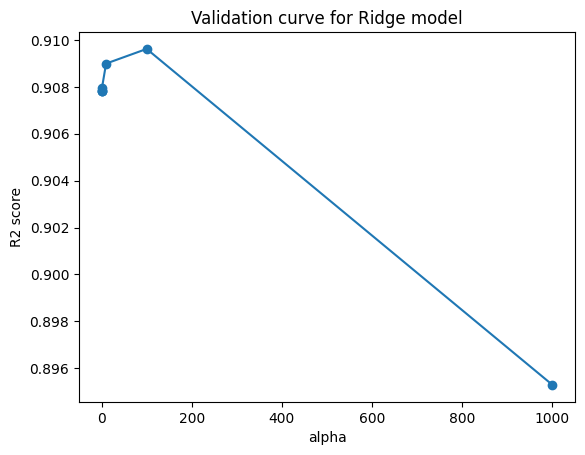

MSE (Ridge model): 33315.367304492065
R2 (Ridge model): 0.9096164750285077


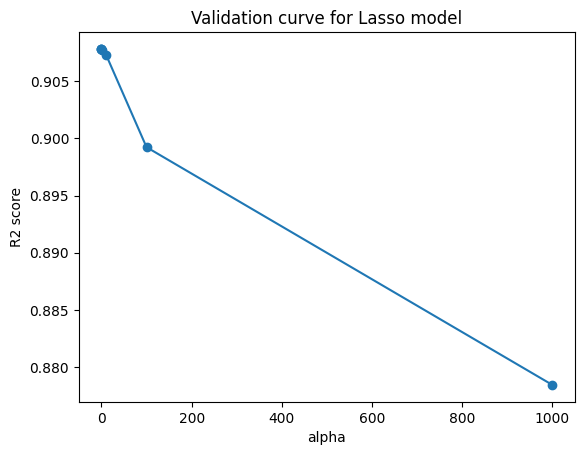

MSE (Lasso model): 33977.255379169525
R2 (Lasso model): 0.9078207938709454
Lasso coefficients: [48.04178074  6.7630191  -4.32631029  3.09714977]


In [ ]:
X.corr()

from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_linreg = lin_reg.predict(X_test)
print("MSE (Linear model without regularization):", mean_squared_error(y_test, y_pred_linreg))
print("R2 (Linear model without regularization):", r2_score(y_test, y_pred_linreg))

ridge = Ridge()
ridge.fit(X_train, y_train)


y_pred_ridge = ridge.predict(X_test)
print("MSE (Ridge model):", mean_squared_error(y_test, y_pred_ridge))
print("R2 (Ridge model):", r2_score(y_test, y_pred_ridge))

lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
print("MSE (Lasso model):", mean_squared_error(y_test, y_pred_lasso))
print("R2 (Lasso model):", r2_score(y_test, y_pred_lasso))

possible_alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
r2_scores = []
for alpha in possible_alpha:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  y_pred_ridge = ridge.predict(X_test)
  r2_scores.append(r2_score(y_test, y_pred_ridge))

plt.plot(possible_alpha, r2_scores, marker="o")
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.title("Validation curve for Ridge model")
plt.show()

ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
print("MSE (Ridge model):", mean_squared_error(y_test, y_pred_ridge))
print("R2 (Ridge model):", r2_score(y_test, y_pred_ridge))


possible_alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
r2_scores = []
for alpha in possible_alpha:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  y_pred_lasso = lasso.predict(X_test)
  r2_scores.append(r2_score(y_test, y_pred_lasso))


plt.plot(possible_alpha, r2_scores, marker="o")
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.title("Validation curve for Lasso model")
plt.show()


lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
print("MSE (Lasso model):", mean_squared_error(y_test, y_pred_lasso))
print("R2 (Lasso model):", r2_score(y_test, y_pred_lasso))
print("Lasso coefficients:", lasso.coef_)



Виведи кореляційну матрицю пояснюючих змінних. Чи є у нас ознаки мультиколінеарності? **Так**

Побудуй регуляризовані моделі лінійної регресії Ridge та Lasso із гіперпараметрами за замовчуванням. Оціни якість цих моделей за допомогою метрик MAE, R2. Чи покращились результати базової моделі? **Майже ні**

Підбери оптимальний гіперпараметр alpha моделі Ridge, використавши масив значень [0.001, 0.01, 0.1, 1, 10, 100, 1000]. Побудуй валідаційну криву. Побудуй модель з оптимальним значенням alpha та оціни її якість.

Підбери оптимальний гіперпараметр alpha моделі Lasso, використавши масив значень [0.001, 0.01, 0.1, 1, 10, 100, 1000]. Побудуй валідаційну криву. Побудуй модель з оптимальним значенням alpha та оціни її якість.

Проаналізуй коефіцієнти моделі Lasso. Чи є у моделі неважливі змінні?